# 02 - Train RandomForest for RUL

This notebook demonstrates training a RandomForest baseline on CMAPSS (FD001), plots feature importance, and displays evaluation results.



In [1]:
# Setup
from pathlib import Path
import json
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

project_root = Path("..").resolve().parents[0] if (Path.cwd().name == "notebooks") else Path(".").resolve().parents[0]
processed_dir = Path("../data/processed").resolve()
models_dir = Path("../models").resolve()
results_dir = Path("../results").resolve()

# Ensure processed data exists
X_train_path = processed_dir / "X_train.npy"
if not X_train_path.exists():
    %run ../scripts/preprocess.py



In [2]:
# Load processed data
X_train = np.load(processed_dir / "X_train.npy")
y_train = np.load(processed_dir / "y_train.npy")
X_val = np.load(processed_dir / "X_val.npy")
y_val = np.load(processed_dir / "y_val.npy")
feature_names = json.loads((processed_dir / "feature_names.json").read_text(encoding="utf-8"))

X_train.shape, X_val.shape


((16504, 26), (4127, 26))

In [10]:
# Train RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print({"MAE": mae, "RMSE": rmse, "R2": r2})
## For Accuracy
# Define the acceptable error margin (e.g., 5 units difference)
TOLERANCE_VALUE = 20 

# Example: Calculate the number of predictions where the difference between
# the prediction (y_pred) and the true value (y_val) is less than 5.
absolute_errors = np.abs(y_val - y_pred)
correct_predictions = (absolute_errors <= TOLERANCE_VALUE)

# 'Accuracy' is the percentage of predictions within the tolerance
tolerance_accuracy = np.mean(correct_predictions)

print(f"Accuracy within +/- {TOLERANCE_VALUE} units: {tolerance_accuracy * 100:.2f}%")

{'MAE': 11.050367498586544, 'RMSE': 16.280339958524163, 'R2': 0.9419870092809}
Accuracy within +/- 20 units: 84.35%


C:\Users\Daksh Mehta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


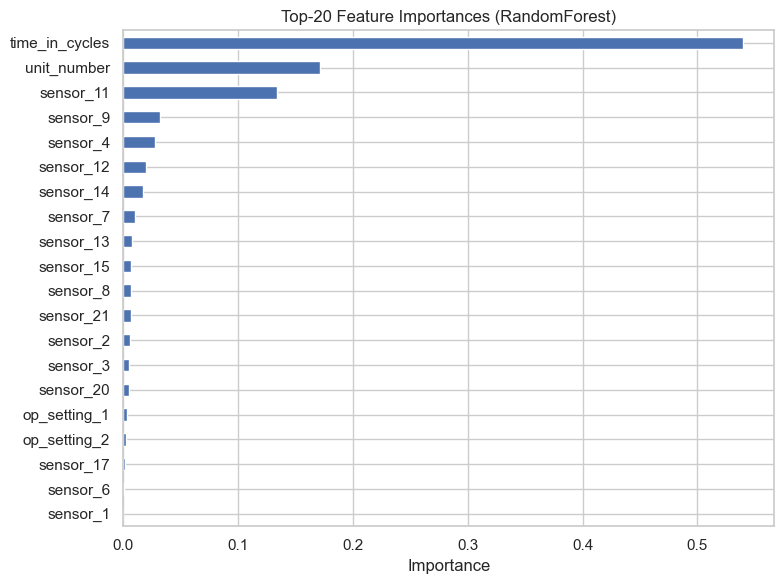

In [8]:
# Feature importance plot
import pandas as pd
import matplotlib.pyplot as plt

imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,6))
imp.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top-20 Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [9]:
# Save artifacts via training script for consistency
%run ../scripts/train_rf_model.py

# Display evaluation report
print((results_dir / "evaluation_report.txt").read_text())


Training complete.
Model saved to:     C:\Users\Daksh Mehta\OneDrive\Desktop\AkashInsights\models\rf_model.pkl
Report saved to:    C:\Users\Daksh Mehta\OneDrive\Desktop\AkashInsights\results\evaluation_report.txt
Importance saved to:C:\Users\Daksh Mehta\OneDrive\Desktop\AkashInsights\results\feature_importance.csv
Metrics:
  MAE: 11.0504
  RMSE: 16.2803
  R2: 0.9420
RandomForest Regressor - RUL Prediction

MAE:  11.0504
RMSE: 16.2803
R^2:  0.9420

Goal: MAE < 20 cycles
